In [73]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np4
import requests
from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [20]:
url = 'https://raw.githubusercontent.com/jarif87/DataSets/main/spam.csv'

response = requests.get(url)

data = pd.read_csv(url,encoding='ISO-8859-1')

data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [21]:
data=data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [22]:
data=data.rename(columns={"v1":"label","v2":"text"})


### ```ham==0```

### ```spam==1```

In [25]:
data['label'] = data['label'].replace({'ham': 0, 'spam': 1})

In [26]:
data.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
data.shape

(5572, 2)

In [27]:
data["label"].value_counts()

0    4825
1     747
Name: label, dtype: int64

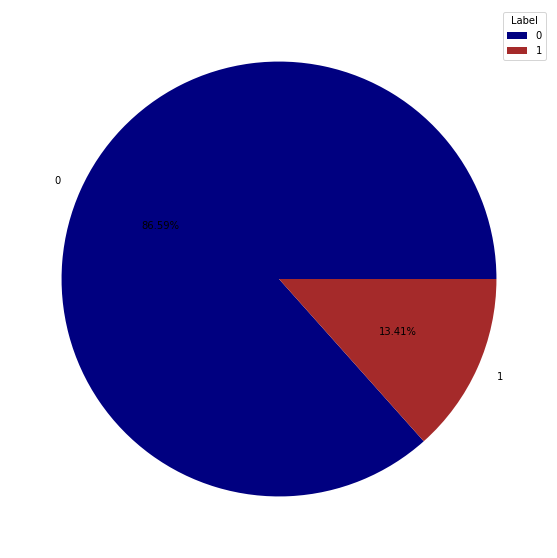

In [45]:
plt.figure(figsize=(10,10))
colors = ['navy','brown']
y=data["label"].value_counts()
plt.pie(y,labels=y.index,autopct='%1.2f%%',colors=colors)
plt.legend(title="Label", loc="best")
plt.show()

````From the above output, you can see that there are 4825 ham messages in our dataset, while the number of spam messages is only 747. The pie chart further highlights the imbalanced nature of our dataset where 86.6% of our records belong to the ham category while only 13.4% of our records are spam.````

In [46]:
ham_message=data[data["label"]==0]
spam_message=data[data["label"]==1]

In [47]:
print(ham_message.shape)

(4825, 2)


In [48]:
print(spam_message.shape)

(747, 2)


# Downsampling with sklearn

###  Downsampling refers to removing records from majority classes in order to create a more balanced dataset. The simplest way of downsampling majority classes is by randomly removing records from that category. Let’s walk through an example.

###  The script below calls the resample() method from the sklearn.utils module for downsampling the ham class. The dataset containing the ham messages is passed as the first argument to the method. The replace = True attribute performs random resampling with replacement. The n_samples attribute defines the number of records you want to select from the original records. We have set the value of this attribute to the number of records in the spam dataset so the two sets will be balanced.

In [52]:
ham_downsample = resample(ham_message,replace=True,n_samples=len(spam_message),random_state=42)
print(ham_downsample.shape)

(747, 2)


### Next, to create a final dataset, you can concatenate your original spam dataset with the down-sampled ham dataset. The following script concatenates the two datasets and again prints the class distribution and a pie chart for the ham and spam messages

In [54]:
data_downsampled = pd.concat([ham_downsample, spam_message])
data_downsampled

,label,text
1014,0,"Ya, told..she was asking wats matter?"
4364,0,Ujhhhhhhh computer shipped out with address to...
3571,0,"Yup, leaving right now, be back soon"
546,0,I know but you need to get hotel now. I just g...
5121,0,"Oops I did have it, &lt;#&gt; ?"
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [55]:
data_downsampled["label"].value_counts()

0    747
1    747
Name: label, dtype: int64

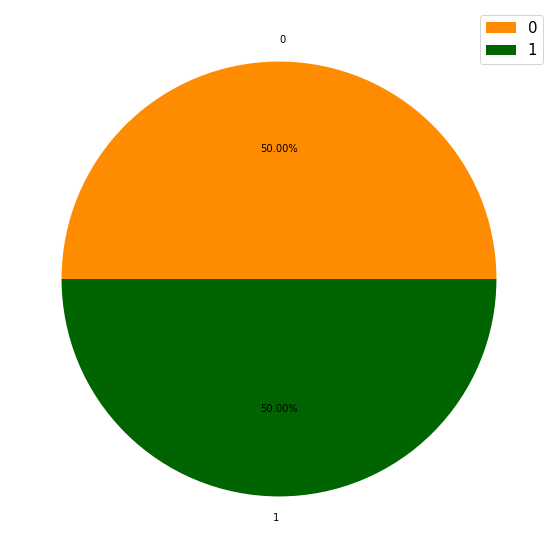

In [58]:
plt.figure(figsize=(10,10))
y=data_downsampled["label"].value_counts()
my_color=["darkorange","darkgreen"]
plt.pie(y,labels=y.index,autopct="%1.2f%%",colors=my_color)
plt.legend(loc="best",fontsize=15)
plt.show()

# Upsampling with sklearn

* Upsampling refers to manually adding data samples to the minority classes in order to create a more balanced dataset.

# In this section, you’ll see two techniques for upsampling

```You can upsample a dataset by simply copying records from minority classes. You can do so via the resample() method from the sklearn.utils module, as shown in the following script.```

In [62]:
spam_upsample = resample(spam_message,replace=True,n_samples=len(ham_message),random_state=42)
spam_upsample.shape

(4825, 2)

```You can see that in this case, the first argument we pass the resample() method is our minority class, i.e. our spam dataset. The value for the n_samples parameter is set to the number of records in the majority class (ham messages) since we want equal representation for both classes in our dataset.```

* From the output above, you can see that the number of spam messages has increased to 4825 - equal to the number of ham messages.

* To create our final dataset after upsampling, you can concatenate the original ham messags dataset with the upsampled spam message dataset, as demonstrated in the following script. The script below also shows the class distribution via a pie chart.

In [64]:
data_upsampled = pd.concat([ham_message, spam_upsample])
data_upsampled

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
6,0,Even my brother is not like to speak with me. ...
...,...,...
4246,1,Text PASS to 69669 to collect your polyphonic ...
3673,1,You have won a Nokia 7250i. This is what you g...
3618,1,8007 25p 4 Alfie Moon's Children in Need song ...
3499,1,Dorothy@kiefer.com (Bank of Granite issues Str...


In [65]:
data_upsampled["label"].value_counts()

0    4825
1    4825
Name: label, dtype: int64

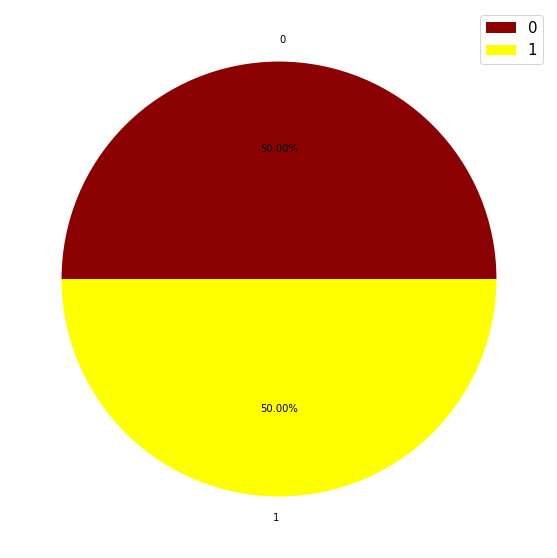

In [78]:
plt.figure(figsize=(10,10))
y=data_upsampled["label"].value_counts()
my_color=["darkred","yellow"]
plt.pie(y,labels=y.index,autopct="%1.2f%%",colors=my_color)
plt.legend(loc="best",fontsize=15)
plt.show()

# Upsampling with SMOTE

* Upsampling by simply copying records may lead to overfitting when you train machine learning models. Techniques have been developed that add instances to dataset which are not exactly the copy of existing instances but are very similar to the original instances.

* One such technique is SMOTE - Synthetic Minority Over-sampling Technique. If you’re curious about the math behind this technique, you can read the research paper that proposed SMOTE.

###  SMOTE, like other statistical algorithms, works with numerical data and requires both feature and label sets. In our dataset, the feature set consists of text messages. You need to convert this text to numeric form before you can apply SMOTE. One way to convert text to numbers is with TFIDF vectorization, which is available in sklearn.

### You can call the TfidfVectorizer class from the sklearn.feature_extraction.text submodule to convert text to something numeric. You have to pass the dataframe column containing your text to the fit_transform() method of the TfidfVectorizer object, as shown in the script below.

In [68]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['text'])

```Our label set also consists of text labels, ham and spam. You need to convert these to numbers as well. This next script replaces the label ham with 0, and the label spam with 1 in the v1 column of our dataset```

In [69]:
data.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [71]:
y =data[['label']]

* We have converted both feature set (X), and label set (y) to numeric form so now we’re ready to apply SMOTE for upsampling our dataset.

* The following script imports the SMOTE class from the imblearn.over_sampling module. To perform SMOTE, you need to pass your feature and label sets to the fit_resample sample method of the SMOTE class object.

In [75]:
su = SMOTE(random_state=42)
X_data, y_label = su.fit_resample(X, y)

In [77]:
y_label["label"].value_counts()

0    4825
1    4825
Name: label, dtype: int64

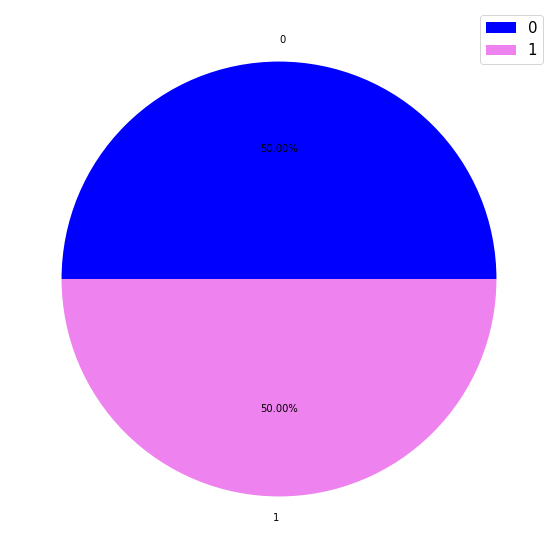

In [80]:
plt.figure(figsize=(10,10))
y=y_label["label"].value_counts()
my_color=["blue","violet"]
plt.pie(y,labels=y.index,autopct="%1.2f%%",colors=my_color)
plt.legend(loc="best",fontsize=15)
plt.show()

## [References](https://wellsr.com/python/upsampling-and-downsampling-imbalanced-data-in-python/)